In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from solutions_biv import violinbox_solution_1

We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [3]:
fuel_econ.dtypes

id             int64
make          object
model         object
year           int64
VClass        object
drive         object
trans         object
fuelType      object
cylinders      int64
displ        float64
pv2            int64
pv4            int64
city         float64
UCity        float64
highway      float64
UHighway     float64
comb         float64
co2            int64
feScore        int64
ghgScore       int64
dtype: object

### Preparatory Step
The cars in this dataset are categorized into one of five different vehicle classes based on size. Starting from the smallest, they are: `{Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, and Large Cars}`. 



### **TO DO**: 
1. What is the relationship between the size of a car and the size of its engine? The vehicle classes can be found in the `VClass` column, while the engine sizes are in the `displ` column (in liters). 

**Hint**: Make sure that the order of vehicle classes makes sense in your plot!

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

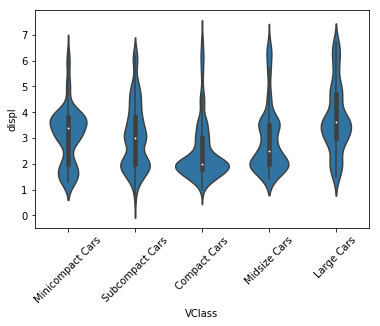

In [4]:
# YOUR CODE HERE
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclass = pd.api.types.CategoricalDtype(categories = sedan_classes, ordered = True)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclass)
base_color = sns.color_palette()[0]
sns.violinplot(data = fuel_econ, x = 'VClass', y = 'displ', color = base_color)
plt.xticks(rotation = 45)

I used a violin plot to depict the data in this case; you might have chosen a box plot instead. One of the interesting things about the relationship between variables is that it isn't consistent. Compact cars tend to have smaller engine sizes than the minicompact and subcompact cars, even though those two vehicle sizes are smaller. The box plot would make it easier to see that the median displacement for the two smallest vehicle classes is greater than the third quartile of the compact car class.



(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

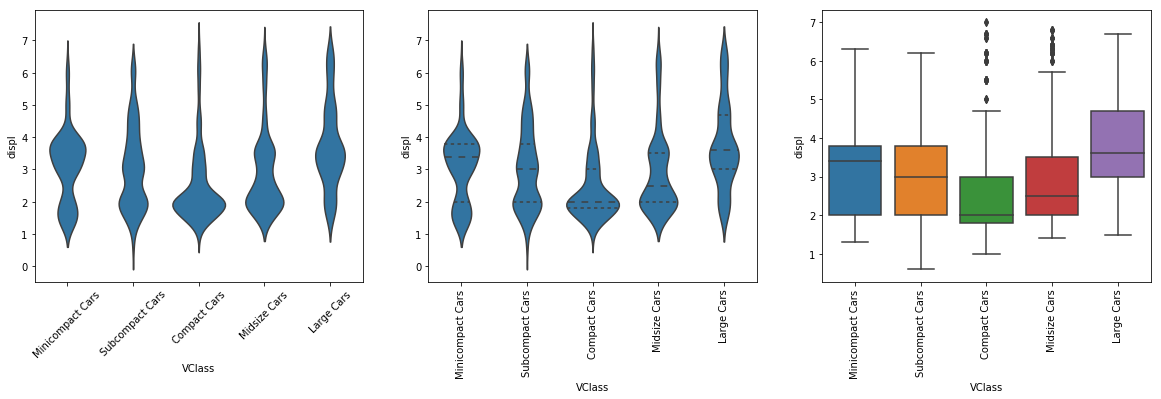

In [5]:
plt.figure(figsize=[20,5])
base_color = sns.color_palette()[0]
plt.subplot(1,3,1)
ax1 = sns.violinplot(data = fuel_econ, x = 'VClass', y = 'displ', inner = None, color = base_color)
plt.xticks(rotation = 45)

#2nd plot

plt.subplot(1,3,2)
ax2 = sns.violinplot(data = fuel_econ, x = 'VClass', y = 'displ', inner = 'quartile', color = base_color)
plt.xticks(rotation = 90)

# 3rd plot

plt.subplot(1,3,3)
ax3 = sns.boxplot(data = fuel_econ, x = 'VClass', y = 'displ')
plt.xticks(rotation = 90)




In [6]:
fuel_econ['fuelType'].value_counts()

Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: fuelType, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

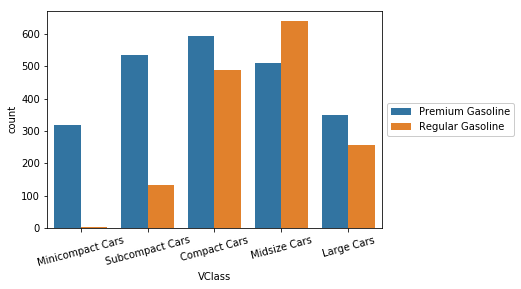

In [7]:
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline','Regular Gasoline'])]
sns.countplot(data = fuel_econ_sub, x = 'VClass', hue = 'fuelType')
plt.legend(loc = 6, framealpha = 1,  bbox_to_anchor=(1,.5)) #
plt.xticks(rotation = 15)

In [8]:
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
id           3929 non-null int64
make         3929 non-null object
model        3929 non-null object
year         3929 non-null int64
VClass       3929 non-null category
drive        3929 non-null object
trans        3929 non-null object
fuelType     3929 non-null object
cylinders    3929 non-null int64
displ        3929 non-null float64
pv2          3929 non-null int64
pv4          3929 non-null int64
city         3929 non-null float64
UCity        3929 non-null float64
highway      3929 non-null float64
UHighway     3929 non-null float64
comb         3929 non-null float64
co2          3929 non-null int64
feScore      3929 non-null int64
ghgScore     3929 non-null int64
dtypes: category(1), float64(6), int64(8), object(5)
memory usage: 587.3+ KB


In [9]:
fuel_econ.trans.value_counts()

Automatic (S8)                      814
Automatic (S6)                      739
Manual 6-spd                        658
Automatic (AM-S7)                   226
Automatic 7-spd                     212
Automatic (variable gear ratios)    178
Automatic 8-spd                     138
Manual 5-spd                        126
Automatic 6-spd                     126
Automatic (S7)                       98
Automatic (AM-S6)                    91
Manual 7-spd                         77
Automatic (AM6)                      75
Automatic (AM7)                      63
Automatic 9-spd                      62
Automatic (AV-S6)                    43
Automatic (AV-S7)                    43
Automatic 5-spd                      33
Automatic (AM-S8)                    27
Automatic 4-spd                      25
Automatic (AV-S8)                    22
Automatic (S5)                       14
Automatic (S9)                       14
Automatic (S10)                      13
Automatic (A1)                        7


In [10]:
# extracting first value from the trans column.
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


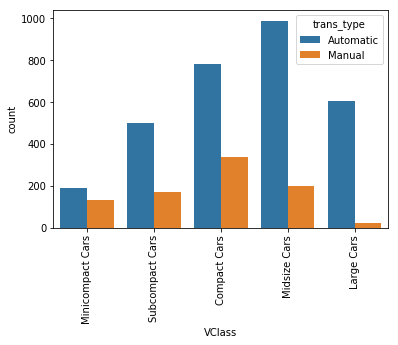

In [11]:
#countplot
sns.countplot(x = 'VClass', hue = 'trans_type', data = fuel_econ)
plt.xticks(rotation = 90)
plt.show()

In [12]:
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [13]:
#converting series to pandas data frame
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [14]:
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


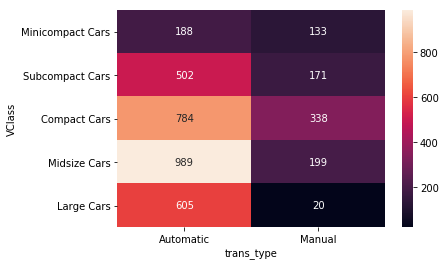

In [15]:
#Adding fmt = 'd' means that annotations will all be formatted as integers instead. 
#You can use fmt = '.0f' if you have any cells with no counts, in order to account for NaNs.
sns.heatmap(ct_counts, annot = True, fmt ='d')

Faceting

In [16]:
fuel_econ.comb.describe()

count    3929.000000
mean       24.791339
std         6.003246
min        12.821700
25%        20.658100
50%        24.000000
75%        28.227100
max        57.782400
Name: comb, dtype: float64

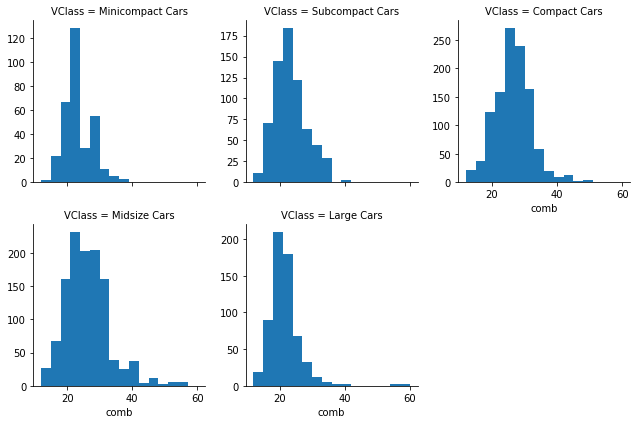

In [17]:
bin_edges = np.arange(12, 58+3, 3)
g = sns.FacetGrid(data = fuel_econ, col = 'VClass', sharey = False, col_wrap = 3)
g.map(plt.hist, 'comb', bins = bin_edges)

In [18]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans','comb']].groupby(['trans']).mean()
group_means.head()

,comb
trans,
Automatic (A1),34.677929
Automatic (AM-S6),27.770877
Automatic (AM-S7),21.572946
Automatic (AM-S8),24.119489
Automatic (AM6),33.194893


In [19]:
# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index
group_order

Index(['Automatic (variable gear ratios)', 'Automatic (A1)', 'Automatic (AM6)',
       'Automatic (AV-S6)', 'Automatic (AV-S7)', 'Manual 5-spd',
       'Automatic 4-spd', 'Automatic (AM8)', 'Automatic (AV-S10)',
       'Automatic (AM-S6)', 'Automatic (AV-S8)', 'Manual 6-spd',
       'Automatic (S6)', 'Automatic 6-spd', 'Automatic (S5)', 'Automatic (S9)',
       'Automatic (AM-S8)', 'Automatic (AM7)', 'Automatic 9-spd',
       'Automatic (S7)', 'Automatic (S8)', 'Manual 7-spd', 'Automatic (AM-S7)',
       'Automatic (S10)', 'Automatic 7-spd', 'Automatic 8-spd',
       'Automatic 5-spd'],
      dtype='object', name='trans')

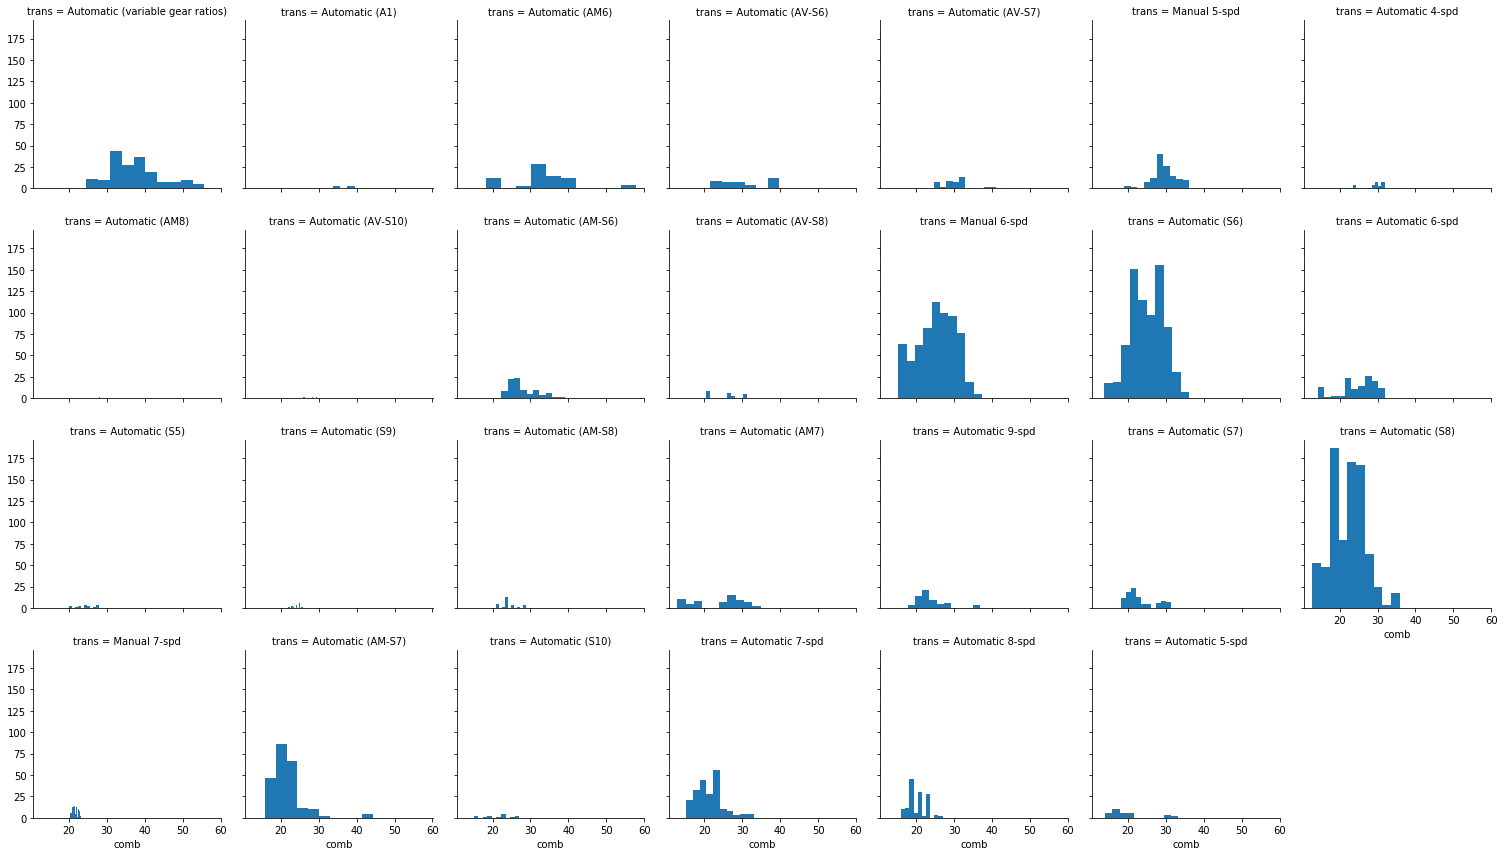

In [20]:
g = sns.FacetGrid(data = fuel_econ, col =  'trans', col_order = group_order, col_wrap = 7)
g.map(plt.hist, 'comb')

Text(0,0.5,'Avg. Combined Fuel Efficiency (mpg)')

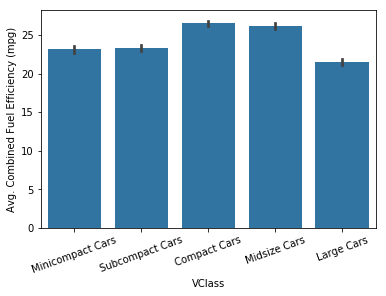

In [21]:
base_color = sns.color_palette()[0]
sns.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)
plt.xticks(rotation = 20)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size. 

Text(0,0.5,'Avg. Combined Fuel Efficiency (mpg)')

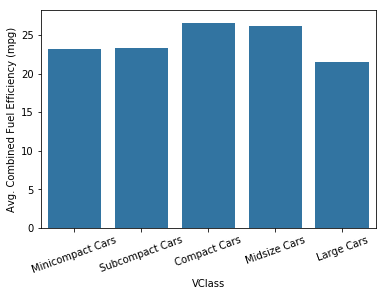

In [22]:
sns.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, errwidth=0)
plt.xticks(rotation = 20)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

Text(0,0.5,'Avg. Combined Fuel Efficiency (mpg)')

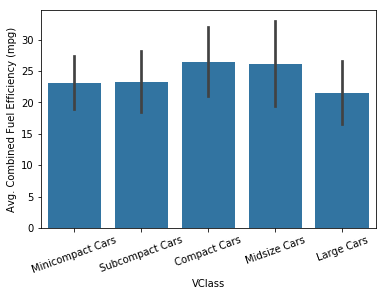

In [23]:
sns.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, ci = 'sd')
plt.xticks(rotation = 20)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)') # black lines showing the std of the comb

Text(0,0.5,'Avg. Combined Fuel Efficiency (mpg)')

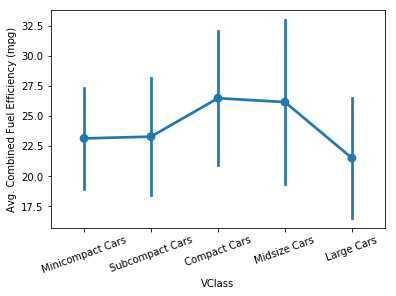

In [24]:
sns.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd')
plt.xticks(rotation = 20)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

The above plots can be useful alternatives to the box plot and violin plot if the data is not conducive to either of those plot types. For example, if the numeric variable is binary in nature, taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data.

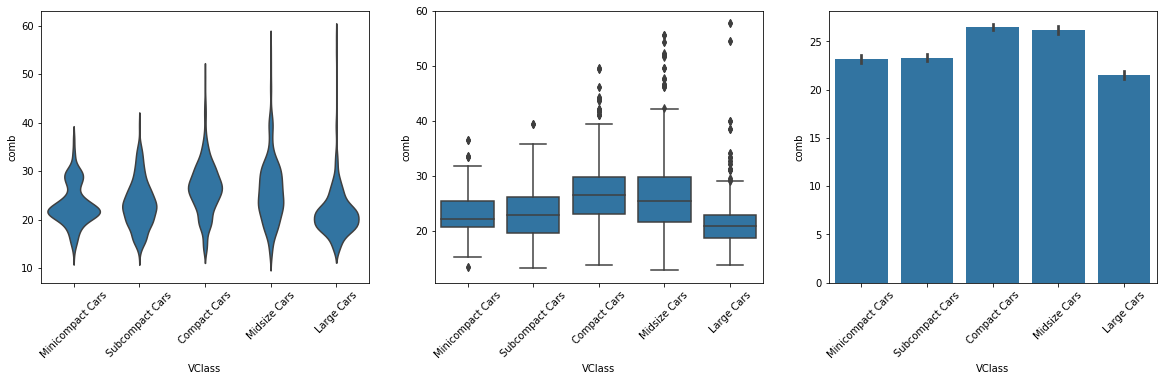

In [25]:
#1st plot
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sns.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', inner = None, color = base_color)
plt.xticks(rotation = 45);

#2nd plot
plt.subplot(1,3,2)
sns.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color);
plt.xticks(rotation = 45)

#3rd plot
plt.subplot(1, 3, 3)
sns.barplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);


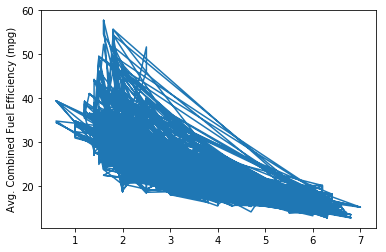

In [26]:
# Errorbar
plt.errorbar(data = fuel_econ, x = 'displ', y = 'comb')
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');


In [27]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


In [28]:
bin_edges = np.arange(.6, 7+.2, .2 )
bin_edges

array([ 0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,
        2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,
        5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,  6.8,  7. ])

In [29]:
bin_c = bin_edges[:-1] + 0.1
bin_c

array([ 0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,  2.3,  2.5,  2.7,
        2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,  4.5,  4.7,  4.9,
        5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,  6.7,  6.9])

In [30]:
displ_bin = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
displ_bin.head()

0    (3.6, 3.8]
1    (1.8, 2.0]
2    (3.4, 3.6]
3    (3.4, 3.6]
4    (2.2, 2.4]
Name: displ, dtype: category
Categories (32, interval[float64]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

In [31]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_bin).mean()
comb_mean.head()

displ
(0.599, 0.8]    37.057583
(0.8, 1.0]      33.469158
(1.0, 1.2]      35.838600
(1.2, 1.4]      31.964468
(1.4, 1.6]      30.489490
Name: comb, dtype: float64

In [32]:
comb_std = fuel_econ['comb'].groupby(displ_bin).std()
comb_std.head()

displ
(0.599, 0.8]    2.648632
(0.8, 1.0]      1.448621
(1.0, 1.2]      2.401971
(1.2, 1.4]      3.465692
(1.4, 1.6]      5.059187
Name: comb, dtype: float64

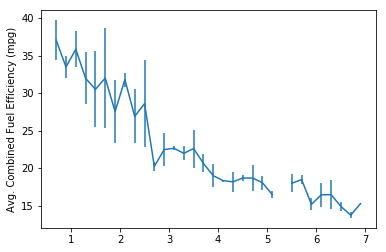

In [33]:
#plotting error bar using above calculated values
plt.errorbar(x = bin_c, y = comb_mean, yerr = comb_std)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

Task 1:

Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

In [34]:
Threshold = 80
make_freq = fuel_econ['make'].value_counts()
idx = np.sum(make_freq > Threshold)
idx

18

In [35]:
most_makes = make_freq.index[:idx]
most_makes

Index(['BMW', 'Mercedes-Benz', 'Porsche', 'Ford', 'Chevrolet', 'Audi', 'MINI',
       'Volkswagen', 'Hyundai', 'Dodge', 'Lexus', 'Kia', 'Cadillac', 'Toyota',
       'Infiniti', 'Honda', 'Jaguar', 'Mazda'],
      dtype='object')

In [36]:
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]
fuel_econ_sub

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6,Automatic
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,...,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5,Automatic
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,...,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5,Automatic
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,...,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6,Manual
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,...,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4,Automatic
10,32217,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,6,3.8,...,0,18.1909,22.8000,26.7761,37.9000,21.2581,420,5,5,Manual


In [37]:
make_mean = fuel_econ_sub.groupby('make').mean()
make_mean.head()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
make,,,,,,,,,,,,,,
Audi,35835.398010,2015.532338,5.512438,2.751741,25.781095,48.786070,20.426925,25.652045,29.389482,40.513205,23.639240,384.676617,5.432836,5.402985
BMW,35953.648184,2015.493308,5.973231,3.083748,35.441683,55.269598,19.862614,25.157074,28.649093,40.927519,23.004798,394.885277,5.221797,5.214149
Cadillac,36052.110169,2015.584746,5.474576,3.243220,24.398305,93.983051,18.845043,24.039474,26.939762,38.256114,21.773203,408.686441,4.915254,4.932203
Chevrolet,35903.301887,2015.476415,4.886792,2.599528,19.740566,67.037736,23.955976,31.080558,33.017294,47.937314,27.224809,343.957547,6.386792,6.353774
Dodge,35907.100000,2015.278571,6.285714,4.225714,32.228571,41.035714,18.516134,23.345414,27.948863,39.730484,21.812190,424.164286,4.878571,4.878571


In [38]:
comb_order = make_mean.sort_values('comb', ascending = False).index
comb_order

Index(['Toyota', 'Honda', 'Mazda', 'Hyundai', 'Kia', 'MINI', 'Volkswagen',
       'Chevrolet', 'Ford', 'Lexus', 'Audi', 'BMW', 'Infiniti', 'Dodge',
       'Cadillac', 'Mercedes-Benz', 'Porsche', 'Jaguar'],
      dtype='object', name='make')

In [39]:
fuel_econ_sub.comb.describe()

count    3208.000000
mean       25.198091
std         5.956012
min        13.858000
25%        21.000000
50%        24.391000
75%        28.530925
max        57.782400
Name: comb, dtype: float64

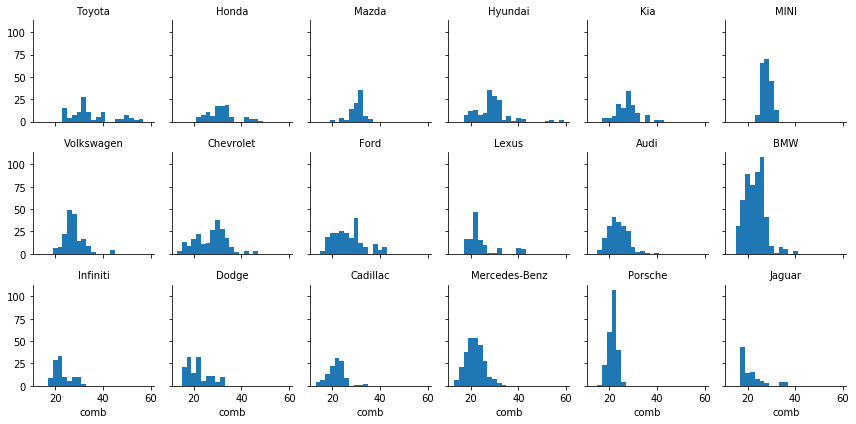

In [40]:
g = sns.FacetGrid(data = fuel_econ_sub, col = 'make', col_order = comb_order, col_wrap = 6, size = 2)
g.map(plt.hist, 'comb', bins = np.arange(13, 58+2,2))
g.set_titles('{col_name}')

Task 2:

Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.


Text(0.5,0,'Average Combined Fuel Eff. (mpg)')

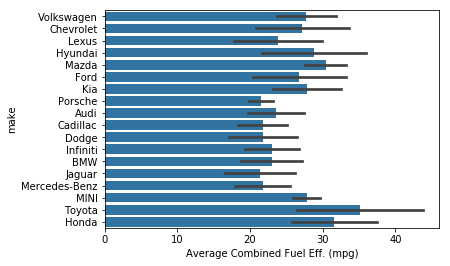

In [41]:
sns.barplot(data = fuel_econ_sub, y = 'make', x = 'comb', color = base_color, ci = 'sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)')

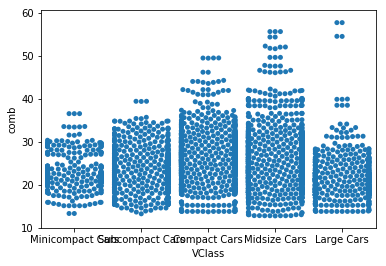

In [43]:
sns.swarmplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color)

JointGrid, swarm and rug plot

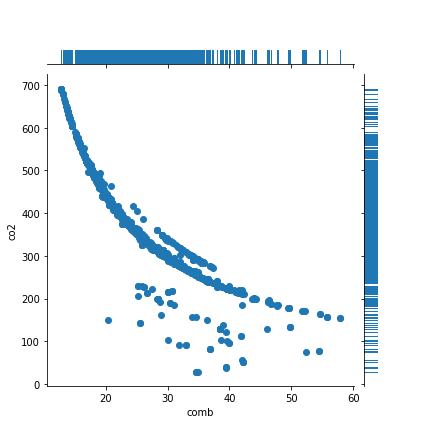

In [45]:
g = sns.JointGrid(data = fuel_econ, x = 'comb', y = 'co2')
g.plot_joint(plt.scatter)
g.plot_marginals(sns.rugplot, height = .25)

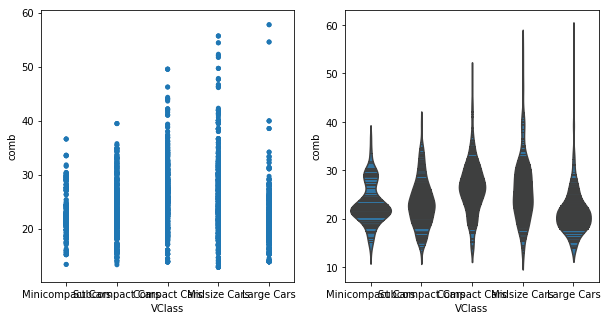

In [48]:
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]

# left plot: strip plot
plt.subplot(1, 2, 1)
ax1 = sns.stripplot(data = fuel_econ, x = 'VClass', y = 'comb',
                   color = base_color)

# right plot: violin plot with inner strip plot as lines
plt.subplot(1, 2, 2)
sns.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color,
             inner = 'stick')